# Group Assignment: Pandas & OLS

## Members: Yuwen CHE, Xiaoyi HAO, Hemin HE, Yang LI, Yun LI, Yi LIANG

### The topic of our research: Relationship between scientific innovation and high-tech enterprises

### 1. Interpretation of variables and data sources
y: number of patents   Data source: the State Statistical Bureau

x1: number of high-tech enterprises   Data source: the State Statistical Bureau, Ministry of Science and Technology of PRC

x2: number of R & D department employees   Data source: CEInet

x3: number of university graduates   Data source: Ministry of Education of PRC

x4: number of scientific events in Chinese universities   Data source: Ministry of Education of PRC

In [2]:
import pandas as pd
data = pd.read_csv('./data.csv')
data.head()

,province_name,province,year,patent,student,science,enterprise,RD_num
0,BJ,1.0,2009.0,50236.0,11.21,40.0,1150.0,25.27
1,BJ,1.0,2010.0,57296.0,11.01,40.0,1103.0,26.99
2,BJ,1.0,2011.0,77955.0,11.12,39.0,737.0,29.70
3,BJ,1.0,2012.0,92305.0,11.38,39.0,760.0,32.24
4,BJ,1.0,2013.0,123336.0,11.41,39.0,782.0,33.42


### 2. Data Visualization

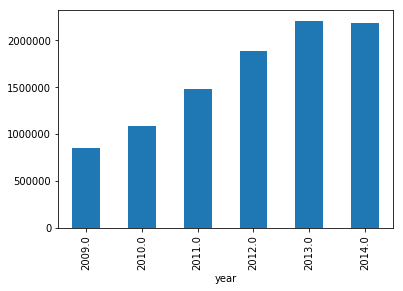

In [3]:
import matplotlib.pyplot as plt
grouped_year = data.groupby('year')
grouped_year['patent'].sum().plot(kind='bar')

plt.show()

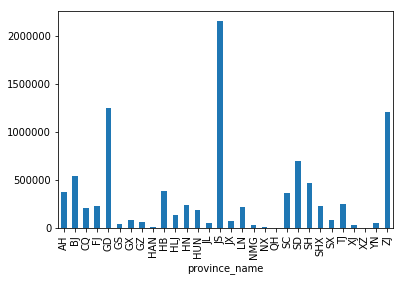

In [5]:
import matplotlib.pyplot as plt
grouped_provience = data.groupby('province_name')
grouped_provience['patent'].sum().plot(kind='bar')

plt.show()

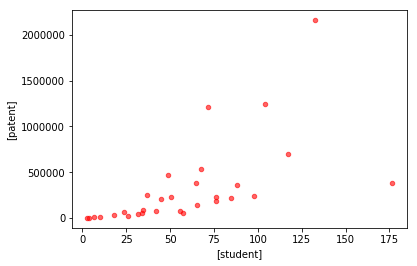

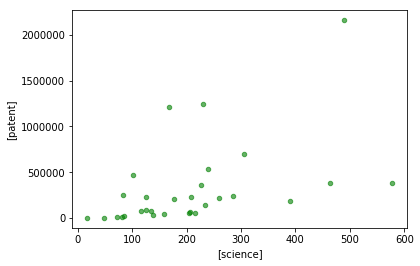

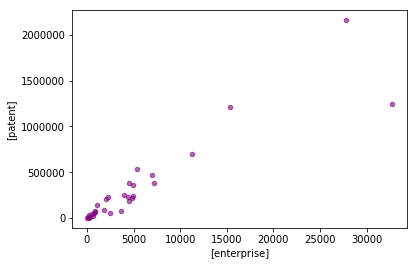

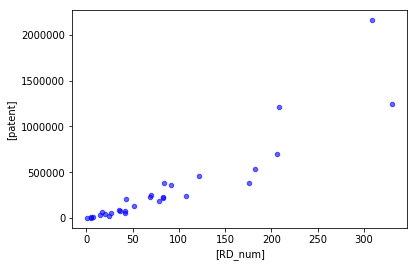

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

grouped_provience = data.groupby('province_name')
grouped_provience['patent','student','science','enterprise','RD_num'].sum()
to_plot = ['student','science','enterprise','RD_num']

a = grouped_provience['patent','student','science','enterprise','RD_num'].sum()

grouped_provience['patent','student','science','enterprise','RD_num'].sum().plot(x=['student'], y=['patent'], kind='scatter', alpha=0.6,color = 'red')
grouped_provience['patent','student','science','enterprise','RD_num'].sum().plot(x=['science'], y=['patent'], kind='scatter', alpha=0.6, color = 'green')
grouped_provience['patent','student','science','enterprise','RD_num'].sum().plot(x=['enterprise'], y=['patent'], kind='scatter', alpha=0.6, color = 'purple')
grouped_provience['patent','student','science','enterprise','RD_num'].sum().plot(x=['RD_num'], y=['patent'], kind='scatter', alpha=0.6, color = 'blue')

plt.show()


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./data.csv')
data[['patent','student','science','enterprise','RD_num']].describe()

,patent,student,science,enterprise,RD_num
count,186.000000,186.000000,186.000000,186.000000,186.000000
mean,52142.408602,9.405591,33.204301,841.709677,13.833387
std,81747.285500,5.775271,19.750366,1249.116445,14.294546
min,162.000000,0.460000,3.000000,5.000000,0.160000
25%,6877.500000,5.067500,19.000000,134.250000,4.132500
50%,23341.500000,8.950000,32.000000,453.500000,9.005000
75%,57024.000000,13.287500,40.750000,830.000000,16.972500
max,504500.000000,24.560000,113.000000,5874.000000,67.650000


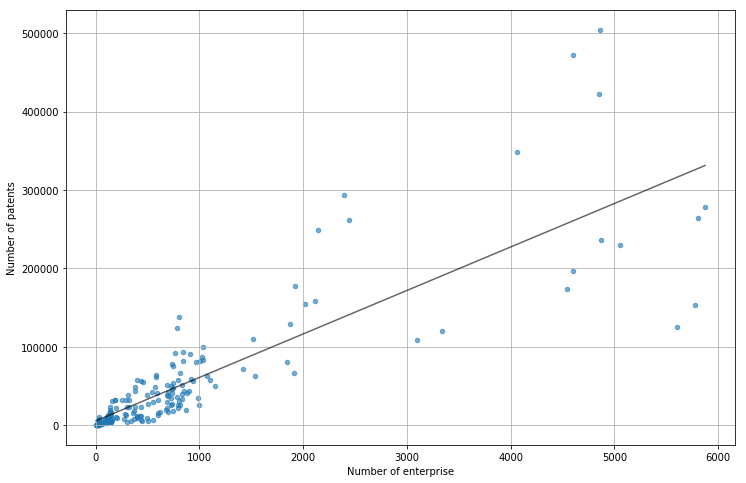

In [12]:
data.plot(x='enterprise', y='patent', kind='scatter', alpha=0.6, figsize=(12, 8))
plt.xlabel('Number of enterprise')
plt.ylabel('Number of patents')

plt.plot(np.unique(data['enterprise']),
         np.poly1d(np.polyfit(data['enterprise'], data['patent'], 1))(np.unique(data['enterprise'])),
         color='black', alpha=0.6)

plt.grid()
plt.show()

### 3. OLS linear regression model & Conclusions

In [13]:
import statsmodels.api as sm
data['constant'] = 1
data['science'] = data['science']**3
data['inter'] = data['enterprise']*(data['student']**3)
reg = sm.OLS(endog=data['patent'], exog=data[['constant','student', 'science','enterprise','RD_num','inter']], missing='drop')
print(reg)
results = reg.fit()
print(results.summary())

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                 patent   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     331.1
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           9.66e-89
Time:                        21:18:57   Log-Likelihood:                -2151.4
No. Observations:                 186   AIC:                             4315.
Df Residuals:                     180   BIC:                             4334.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant    2887.2682   3999.357      0.722      0.4

#### In the above models, the effect of the number of R & D department employees on the number of patents is significant at a 99% confidence level. However, the introduction of the variable “the number of R & D department employees” leads to the result that the coefficient of “number of university graduates” shows a negative value and that the effect of the number of high-tech enterprises on the dependent variable is not significant. Thus, we delete the variable “number of R & D department employees”.

In [14]:
# Remove the "RD_num"
import statsmodels.api as sm
data['constant'] = 1
data['science'] = data['science']**3
data['inter'] = data['enterprise']*(data['student']**3)
reg = sm.OLS(endog=data['patent'], exog=data[['constant','student', 'science','enterprise','inter']], missing='drop')
print(reg)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 patent   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     373.0
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           2.77e-65
Time:                        21:19:14   Log-Likelihood:                -2216.3
No. Observations:                 186   AIC:                             4439.
Df Residuals:                     183   BIC:                             4448.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0302      0.003     11.160      0.0

#### Effects of the number of high-tech enterprises, the number of university graduates, the number of scientific events, and the interactive term of the number of high-tech enterprises and that of university graduates on the number of patents are all significant at a 99% confidence level. 

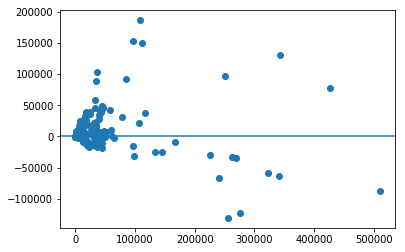

In [15]:
plt.scatter(results.predict(), results.resid)
plt.axhline()
plt.show()

#### From the above plot, we can see that heteroskedascity is present. Therefore, robust standard errors should be used.

In [16]:
results = reg.fit(cov_type='HC0') # cov_type = 'HC0' -- corrects the error caused by heteroskedasticity
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 patent   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     56.82
Date:                Sun, 28 Jan 2018   Prob (F-statistic):           4.28e-31
Time:                        21:19:36   Log-Likelihood:                -2216.3
No. Observations:                 186   AIC:                             4439.
Df Residuals:                     183   BIC:                             4448.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0302      0.007      4.589      0.0

#### After dealing with the problem of heteroskedascity, we come to the following conclusions:
#### 1.The effect of the number of high-tech enterprises on the number of patents is significant at a 99% confidence level.
#### 2.The effect of the number of university graduates on the number of patents is significant at a 99% confidence level.
#### 3.The effect of the number of scientific events on the number of patents is significant at a 90% confidence level.
#### 4.The effect of the interactive term between the number of high-tech enterprises and that of university graduates is significant at a 99% confidence level.

### 4. Ecomomic meanings

#### Due to the conclusion, it is clear that our research has the following economic meanings:
#### 1.The government is supposed to encourage the development of high-tech companies. By providing tax relief and supporting infrastructure construction, the government can contribute to the rapid progress of high-tech companies.
#### 2.Innovation is essential for our country, so high-level education for under-graduates should be supported and activities related to science should be promoted.
#### 3.Nowadays, more and more universities have engaged in the cooperation with big name companies, which is quite beneficial for the economic and scientific development. Thus, this way of talent cultivation should be continued and improved.